In [1]:
import rasterio as rio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import statsmodels.graphics.api as smg
import geopandas as gpd
from rasterio.enums import Resampling
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
plt.ion()

Carga de Variables

In [2]:
# Función para ajustar la longitud de los arrays
def adjust_length(array, desired_length):
    current_length = len(array)
    if current_length > desired_length:
        # Recortar el array
        return array[:desired_length]
    elif current_length < desired_length:
        # Rellenar el array con NaNs
        return np.concatenate([array, np.full(desired_length - current_length, np.nan)])
    else:
        return array

Metadatos del raster: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 35798, 'height': 38309, 'count': 1, 'crs': CRS.from_epsg(9377), 'transform': Affine(10.0, 0.0, 4544725.24,
       0.0, -10.0, 2540302.7176)}
Valor Nodata: -9999.0


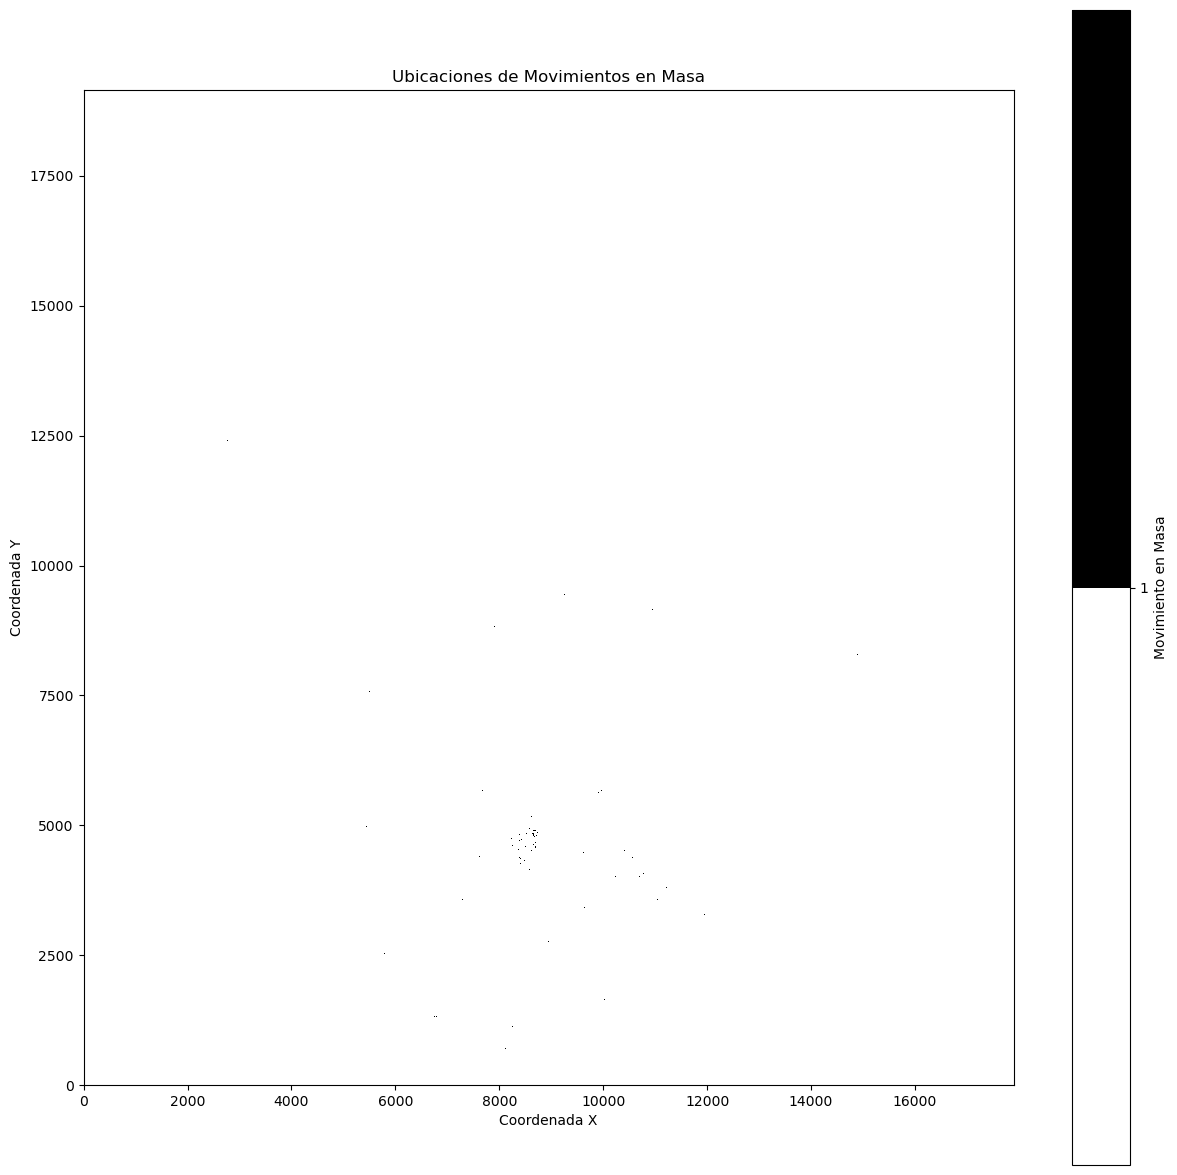

Tamaño del arreglo reducido: (19154, 17898)
Tamaño del vector reducido sin NaNs: (157028388,)
Tamaño de la celda original: 10.0 x 10.0
Tamaño de la celda después de reducir la resolución: 20.001117443289754 x 20.000522084159968


In [8]:
# Ruta al archivo raster
raster_path = r"C:\Users\HOME\radar_antioquia_sentinel\raster\inventario.tif"

# Leer los metadatos del raster y el valor nodata
with rio.open(raster_path) as src:
    raster_meta = src.meta
    nodata_value_inventario = src.nodata

# Imprimir los metadatos del raster y el valor nodata
print(f"Metadatos del raster: {raster_meta}")
print(f"Valor Nodata: {nodata_value_inventario}")

# Dimensiones deseadas
desired_height = 19154
desired_width = 17898

# Reducir la resolución del raster a las dimensiones deseadas
with rio.open(raster_path) as src:
    inventario = src.read(
        out_shape=(src.count, desired_height, desired_width),
        resampling=Resampling.bilinear
    )[0]

# Reemplazar valores no válidos
inventario = np.where(inventario == nodata_value_inventario, np.nan, inventario)

# Ravel y eliminar NaNs
inventario_vector = inventario.ravel()
inventario_vector_MenM = inventario_vector[~np.isnan(inventario_vector)]

# Ajustar la longitud del array a 157,028,388
desired_length = 157028388
inventario_vector_MenM = adjust_length(inventario_vector_MenM, desired_length)

# Asegurar modo interactivo para matplotlib
plt.ion()

# Crear un colormap personalizado: negro para movimientos y blanco para no movimientos
cmap = mcolors.ListedColormap(['white', 'black'])

# Visualizar el raster reducido
plt.figure(figsize=(15, 15))
plt.imshow(inventario, cmap=cmap, interpolation='nearest', extent=[0, inventario.shape[1], 0, inventario.shape[0]])
plt.colorbar(label='Movimiento en Masa', ticks=[0, 1])
plt.title('Ubicaciones de Movimientos en Masa')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.show()

print(f"Tamaño del arreglo reducido: {inventario.shape}")
print(f"Tamaño del vector reducido sin NaNs: {inventario_vector_MenM.shape}")

# Obtener la transformación del raster original
with rio.open(raster_path) as src:
    original_transform = src.transform
    original_cell_size_x = original_transform[0]
    original_cell_size_y = -original_transform[4]
    new_cell_size_x = original_cell_size_x * (src.width / desired_width)
    new_cell_size_y = original_cell_size_y * (src.height / desired_height)

print(f"Tamaño de la celda original: {original_cell_size_x} x {original_cell_size_y}")
print(f"Tamaño de la celda después de reducir la resolución: {new_cell_size_x} x {new_cell_size_y}")

Metadatos del raster: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 36063, 'height': 38593, 'count': 1, 'crs': CRS.from_epsg(9377), 'transform': Affine(9.926097046834702, 0.0, 4544733.9274,
       0.0, -9.926122068768946, 2540297.7057)}
Valor Nodata: -9999.0


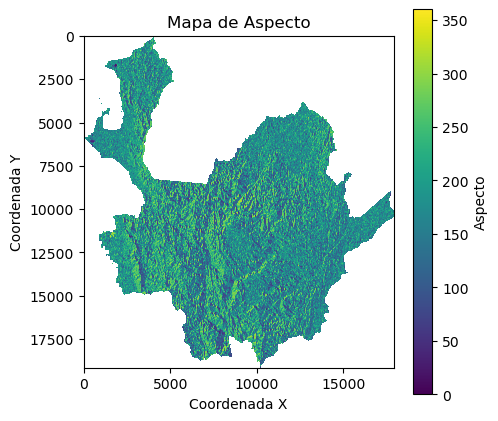

Tamaño del arreglo reducido: (19154, 17898)
Tamaño del vector reducido sin NaNs: (157028388,)
Tamaño de la celda original: 9.926097046834702 x 9.926122068768946
Tamaño de la celda después de reducir la resolución: 20.00027029835735 x 19.999938863944863


In [39]:
# Ruta al archivo raster
raster_path = r"C:\Users\HOME\radar_antioquia_sentinel\raster\aspecto.tif"

# Leer los metadatos del raster y el valor nodata
with rio.open(raster_path) as src:
    raster_meta = src.meta
    nodata_value_aspecto = src.nodata

# Imprimir los metadatos del raster y el valor nodata
print(f"Metadatos del raster: {raster_meta}")
print(f"Valor Nodata: {nodata_value_aspecto}")

# Dimensiones deseadas
desired_height = 19154
desired_width = 17898

# Reducir la resolución del raster a las dimensiones deseadas
with rio.open(raster_path) as src:
    aspecto = src.read(
        out_shape=(src.count, desired_height, desired_width),
        resampling=Resampling.bilinear
    )[0]

# Reemplazar valores no válidos
aspecto = np.where(aspecto == nodata_value_aspecto, np.nan, aspecto)

# Ravel y eliminar NaNs
aspecto_vector = aspecto.ravel()
aspecto_vector_MenM = aspecto_vector[~np.isnan(aspecto_vector)]

# Ajustar la longitud del array a 157,028,388
desired_length = 157028388
aspecto_vector_MenM = adjust_length(aspecto_vector_MenM, desired_length)

# Asegurar modo interactivo para matplotlib
plt.ion()

# Visualizar el raster reducido
plt.figure(figsize=(5, 5))
plt.imshow(aspecto, cmap='viridis')
plt.colorbar(label='Aspecto')
plt.title('Mapa de Aspecto')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.show()

print(f"Tamaño del arreglo reducido: {aspecto.shape}")
print(f"Tamaño del vector reducido sin NaNs: {aspecto_vector_MenM.shape}")

# Obtener la transformación del raster original
with rio.open(raster_path) as src:
    original_transform = src.transform
    original_cell_size_x = original_transform[0]
    original_cell_size_y = -original_transform[4]
    new_cell_size_x = original_cell_size_x * (src.width / desired_width)
    new_cell_size_y = original_cell_size_y * (src.height / desired_height)

print(f"Tamaño de la celda original: {original_cell_size_x} x {original_cell_size_y}")
print(f"Tamaño de la celda después de reducir la resolución: {new_cell_size_x} x {new_cell_size_y}")

Metadatos del raster: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': 0.0, 'width': 35798, 'height': 38309, 'count': 1, 'crs': CRS.from_epsg(9377), 'transform': Affine(10.0, 0.0, 4544725.24,
       0.0, -10.0, 2540302.7176)}
Valor Nodata: 0.0


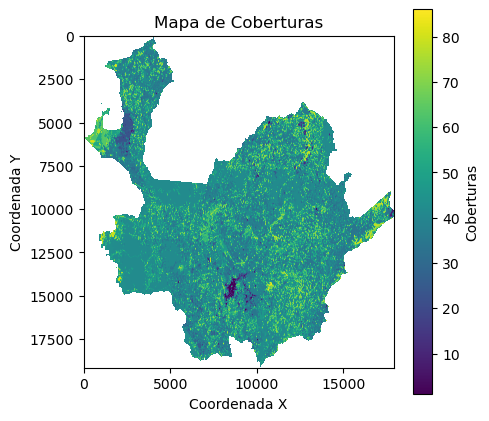

Tamaño del arreglo reducido: (19154, 17898)
Tamaño del vector reducido sin NaNs: (157028388,)
Tamaño de la celda original: 10.0 x 10.0
Tamaño de la celda después de reducir la resolución: 20.001117443289754 x 20.000522084159968


In [40]:
# Ruta al archivo raster
raster_path = r"C:\Users\HOME\radar_antioquia_sentinel\raster\coberturas.tif"

# Leer los metadatos del raster y el valor nodata
with rio.open(raster_path) as src:
    raster_meta = src.meta
    nodata_value_coberturas = src.nodata

# Imprimir los metadatos del raster y el valor nodata
print(f"Metadatos del raster: {raster_meta}")
print(f"Valor Nodata: {nodata_value_coberturas}")

# Dimensiones deseadas
desired_height = 19154
desired_width = 17898

# Reducir la resolución del raster a las dimensiones deseadas
with rio.open(raster_path) as src:
    coberturas = src.read(
        out_shape=(src.count, desired_height, desired_width),
        resampling=Resampling.bilinear
    )[0]

# Reemplazar valores no válidos
coberturas = np.where(coberturas == nodata_value_coberturas, np.nan, coberturas)

# Ravel y eliminar NaNs
coberturas_vector = coberturas.ravel()
coberturas_vector_MenM = coberturas_vector[~np.isnan(coberturas_vector)]

# Ajustar la longitud del array a 157,028,388
desired_length = 157028388
coberturas_vector_MenM = adjust_length(coberturas_vector_MenM, desired_length)

# Asegurar modo interactivo para matplotlib
plt.ion()

# Visualizar el raster reducido
plt.figure(figsize=(5, 5))
plt.imshow(coberturas, cmap='viridis')
plt.colorbar(label='Coberturas')
plt.title('Mapa de Coberturas')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.show()

print(f"Tamaño del arreglo reducido: {coberturas.shape}")
print(f"Tamaño del vector reducido sin NaNs: {coberturas_vector_MenM.shape}")

# Obtener la transformación del raster original
with rio.open(raster_path) as src:
    original_transform = src.transform
    original_cell_size_x = original_transform[0]
    original_cell_size_y = -original_transform[4]
    new_cell_size_x = original_cell_size_x * (src.width / desired_width)
    new_cell_size_y = original_cell_size_y * (src.height / desired_height)

print(f"Tamaño de la celda original: {original_cell_size_x} x {original_cell_size_y}")
print(f"Tamaño de la celda después de reducir la resolución: {new_cell_size_x} x {new_cell_size_y}")

Metadatos del raster: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 36063, 'height': 38593, 'count': 1, 'crs': CRS.from_epsg(9377), 'transform': Affine(9.926097046834702, 0.0, 4544733.9274,
       0.0, -9.92609704609645, 2540296.74)}
Valor Nodata: None


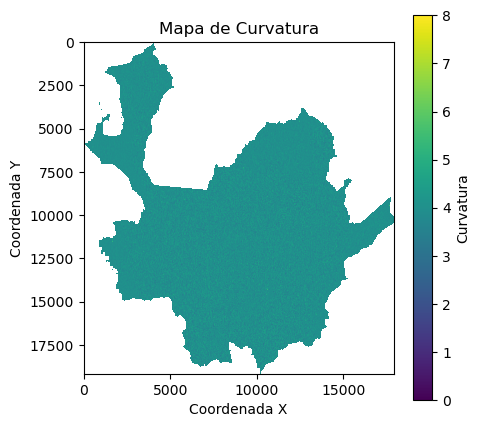

Tamaño del arreglo reducido: (19154, 17898)
Tamaño del vector reducido sin NaNs: (157028388,)
Tamaño de la celda original: 9.926097046834702 x 9.92609704609645
Tamaño de la celda después de reducir la resolución: 20.00027029835735 x 19.999888446277552


In [41]:
# Ruta al archivo raster
raster_path = r"C:\Users\HOME\radar_antioquia_sentinel\raster\curvatura.tif"

# Leer los metadatos del raster y el valor nodata
with rio.open(raster_path) as src:
    raster_meta = src.meta
    nodata_value_curvatura = src.nodata

# Imprimir los metadatos del raster y el valor nodata
print(f"Metadatos del raster: {raster_meta}")
print(f"Valor Nodata: {nodata_value_curvatura}")

# Dimensiones deseadas
desired_height = 19154
desired_width = 17898

# Reducir la resolución del raster a las dimensiones deseadas
with rio.open(raster_path) as src:
    curvatura = src.read(
        out_shape=(src.count, desired_height, desired_width),
        resampling=Resampling.bilinear
    )[0]

# Reemplazar valores igual a 129 con NaN
curvatura = np.where(curvatura == 129, np.nan, curvatura)

# Ravel y eliminar NaNs
curvatura_vector = curvatura.ravel()
curvatura_vector_MenM = curvatura_vector[~np.isnan(curvatura_vector)]

# Ajustar la longitud del array a 157,028,388
desired_length = 157028388
curvatura_vector_MenM = adjust_length(curvatura_vector_MenM, desired_length)

# Asegurar modo interactivo para matplotlib
plt.ion()

# Crear un colormap basado en viridis, pero con nodata sin color
cmap = plt.cm.viridis
cmap.set_bad(color='none')  # Sin color para nodata

# Ajustar los límites del colormap para no considerar el valor 129
curvatura_min = np.nanmin(curvatura)
curvatura_max = 8 #np.nanmax(curvatura)

# Visualizar el raster reducido con nodata sin color
plt.figure(figsize=(5, 5))
plt.imshow(curvatura, cmap=cmap, vmin=curvatura_min, vmax=curvatura_max)
plt.colorbar(label='Curvatura')
plt.title('Mapa de Curvatura')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.show()

print(f"Tamaño del arreglo reducido: {curvatura.shape}")
print(f"Tamaño del vector reducido sin NaNs: {curvatura_vector_MenM.shape}")

# Obtener la transformación del raster original
with rio.open(raster_path) as src:
    original_transform = src.transform
    original_cell_size_x = original_transform[0]
    original_cell_size_y = -original_transform[4]
    new_cell_size_x = original_cell_size_x * (src.width / desired_width)
    new_cell_size_y = original_cell_size_y * (src.height / desired_height)

print(f"Tamaño de la celda original: {original_cell_size_x} x {original_cell_size_y}")
print(f"Tamaño de la celda después de reducir la resolución: {new_cell_size_x} x {new_cell_size_y}")


Metadatos del raster: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': 0.0, 'width': 35796, 'height': 38308, 'count': 1, 'crs': CRS.from_epsg(9377), 'transform': Affine(10.0, 0.0, 4544735.0904,
       0.0, -10.0, 2540295.4723)}
Valor Nodata: 0.0


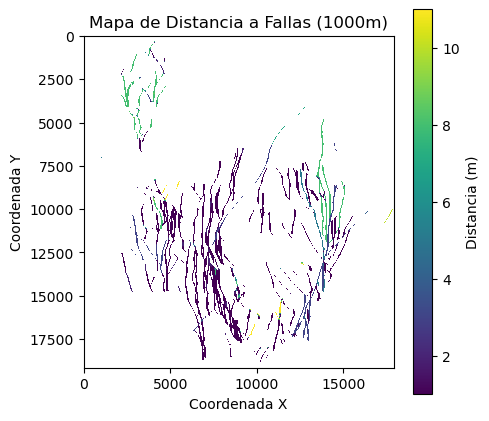

Tamaño del arreglo reducido: (19154, 17898)
Tamaño del vector reducido sin NaNs: (157028388,)
Tamaño de la celda original: 10.0 x 10.0
Tamaño de la celda después de reducir la resolución: 20.0 x 20.0


In [43]:
# Ruta al archivo raster
raster_path = r"C:\Users\HOME\radar_antioquia_sentinel\raster\dist_fallas.tif"

# Leer los metadatos del raster y el valor nodata
with rio.open(raster_path) as src:
    raster_meta = src.meta
    nodata_value_dist_fallas = src.nodata

# Imprimir los metadatos del raster y el valor nodata
print(f"Metadatos del raster: {raster_meta}")
print(f"Valor Nodata: {nodata_value_dist_fallas}")

# Dimensiones deseadas
desired_height = 19154
desired_width = 17898

# Reducir la resolución del raster a las dimensiones deseadas
with rio.open(raster_path) as src:
    dist_fallas = src.read(
        out_shape=(src.count, desired_height, desired_width),
        resampling=Resampling.bilinear
    )[0]

# Reemplazar valores no válidos
dist_fallas = np.where(dist_fallas == nodata_value_dist_fallas, np.nan, dist_fallas)

# Ravel y eliminar NaNs
dist_fallas_vector = dist_fallas.ravel()
dist_fallas_vector_MenM = dist_fallas_vector[~np.isnan(dist_fallas_vector)]

# Ajustar la longitud del array a 157,028,388
desired_length = 157028388
dist_fallas_vector_MenM = adjust_length(dist_fallas_vector_MenM, desired_length)

# Asegurar modo interactivo para matplotlib
plt.ion()

# Visualizar el raster reducido
plt.figure(figsize=(5, 5))
plt.imshow(dist_fallas, cmap='viridis')
plt.colorbar(label='Distancia (m)')
plt.title('Mapa de Distancia a Fallas (1000m)')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.show()

print(f"Tamaño del arreglo reducido: {dist_fallas.shape}")
print(f"Tamaño del vector reducido sin NaNs: {dist_fallas_vector_MenM.shape}")

# Obtener la transformación del raster original
with rio.open(raster_path) as src:
    original_transform = src.transform
    original_cell_size_x = original_transform[0]
    original_cell_size_y = -original_transform[4]
    new_cell_size_x = original_cell_size_x * (src.width / desired_width)
    new_cell_size_y = original_cell_size_y * (src.height / desired_height)

print(f"Tamaño de la celda original: {original_cell_size_x} x {original_cell_size_y}")
print(f"Tamaño de la celda después de reducir la resolución: {new_cell_size_x} x {new_cell_size_y}")

Metadatos del raster: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': 0.0, 'width': 35798, 'height': 38309, 'count': 1, 'crs': CRS.from_epsg(9377), 'transform': Affine(10.0, 0.0, 4544725.24,
       0.0, -10.0, 2540302.7176)}
Valor Nodata: 0.0


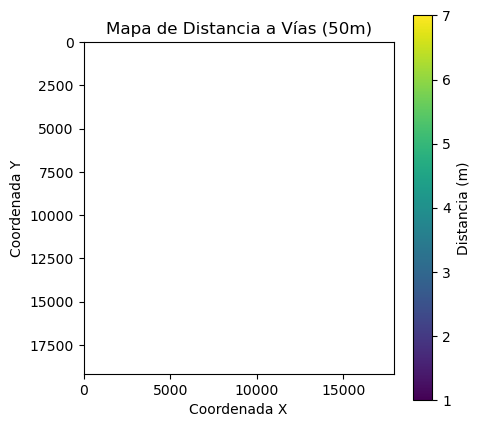

Tamaño del arreglo reducido: (19154, 17898)
Tamaño del vector reducido sin NaNs: (157028388,)
Tamaño de la celda original: 10.0 x 10.0
Tamaño de la celda después de reducir la resolución: 20.001117443289754 x 20.000522084159968


In [44]:
# Ruta al archivo raster
raster_path = r"C:\Users\HOME\radar_antioquia_sentinel\raster\dist_vias.tif"

# Leer los metadatos del raster y el valor nodata
with rio.open(raster_path) as src:
    raster_meta = src.meta
    nodata_value_dist_vias = src.nodata

# Imprimir los metadatos del raster y el valor nodata
print(f"Metadatos del raster: {raster_meta}")
print(f"Valor Nodata: {nodata_value_dist_vias}")

# Dimensiones deseadas
desired_height = 19154
desired_width = 17898

# Reducir la resolución del raster a las dimensiones deseadas
with rio.open(raster_path) as src:
    dist_vias = src.read(
        out_shape=(src.count, desired_height, desired_width),
        resampling=Resampling.bilinear
    )[0]

# Reemplazar valores no válidos
dist_vias = np.where(dist_vias == nodata_value_dist_vias, np.nan, dist_vias)

# Ravel y eliminar NaNs
dist_vias_vector = dist_vias.ravel()
dist_vias_vector_MenM = dist_vias_vector[~np.isnan(dist_vias_vector)]

# Ajustar la longitud del array a 157,028,388
desired_length = 157028388
dist_vias_vector_MenM = adjust_length(dist_vias_vector_MenM, desired_length)

# Asegurar modo interactivo para matplotlib
plt.ion()

# Visualizar el raster reducido
plt.figure(figsize=(5, 5))
plt.imshow(dist_vias, cmap='viridis')
plt.colorbar(label='Distancia (m)')
plt.title('Mapa de Distancia a Vías (50m)')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.show()

print(f"Tamaño del arreglo reducido: {dist_vias.shape}")
print(f"Tamaño del vector reducido sin NaNs: {dist_vias_vector_MenM.shape}")

# Obtener la transformación del raster original
with rio.open(raster_path) as src:
    original_transform = src.transform
    original_cell_size_x = original_transform[0]
    original_cell_size_y = -original_transform[4]
    new_cell_size_x = original_cell_size_x * (src.width / desired_width)
    new_cell_size_y = original_cell_size_y * (src.height / desired_height)

print(f"Tamaño de la celda original: {original_cell_size_x} x {original_cell_size_y}")
print(f"Tamaño de la celda después de reducir la resolución: {new_cell_size_x} x {new_cell_size_y}")

Metadatos del raster: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -99999.0, 'width': 36063, 'height': 38593, 'count': 1, 'crs': CRS.from_epsg(9377), 'transform': Affine(9.926097046834702, 0.0, 4544733.9274,
       0.0, -9.92609704868759, 2540297.2229)}
Valor Nodata: -99999.0


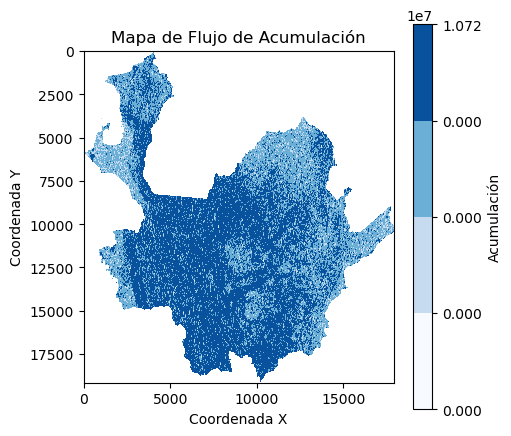

Tamaño de la celda original: 9.926097046834702 x 9.92609704868759
Tamaño de la celda después de reducir la resolución: 20.00027029835735 x 19.99988845149839
Tamaño del arreglo reducido: (19154, 17898)
Tamaño del vector reducido sin NaNs: (157028388,)


In [45]:
# Ruta al archivo raster
raster_path = r"C:\Users\HOME\radar_antioquia_sentinel\raster\flujo_acumulacion.tif"

# Leer los metadatos del raster y el valor nodata
with rio.open(raster_path) as src:
    raster_meta = src.meta
    nodata_value_acumulacion = src.nodata

# Imprimir los metadatos del raster y el valor nodata
print(f"Metadatos del raster: {raster_meta}")
print(f"Valor Nodata: {nodata_value_acumulacion}")

# Dimensiones deseadas
desired_height = 19154
desired_width = 17898

# Reducir la resolución del raster a las dimensiones deseadas
with rio.open(raster_path) as src:
    acumulacion = src.read(
        out_shape=(src.count, desired_height, desired_width),
        resampling=Resampling.bilinear
    )[0]

# Reemplazar valores no válidos
acumulacion = np.where(acumulacion == nodata_value_acumulacion, np.nan, acumulacion)

# Calcular los cuantiles
quantiles = np.nanquantile(acumulacion, [0, 0.25, 0.5, 0.75, 1])

# Crear un mapa de colores personalizado para los cuantiles con tonos de azul
cmap = mcolors.ListedColormap(['#f7fbff', '#deebf7', '#c6dbef', '#9ecae1', '#6baed6', '#3182bd', '#08519c'])
norm = mcolors.BoundaryNorm(quantiles, cmap.N)

# Ravel y eliminar NaNs
acumulacion_vector = acumulacion.ravel()
acumulacion_vector_MenM = acumulacion_vector[~np.isnan(acumulacion_vector)]

# Ajustar la longitud del array a 157,028,388
desired_length = 157028388
acumulacion_vector_MenM = adjust_length(acumulacion_vector_MenM, desired_length)

# Asegurar modo interactivo para matplotlib
plt.ion()

# Visualizar el raster reducido con cuantiles en gama de azules
plt.figure(figsize=(5, 5))
plt.imshow(acumulacion, cmap=cmap, norm=norm)
plt.colorbar(label='Acumulación', ticks=quantiles)
plt.title('Mapa de Flujo de Acumulación')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.show()

# Obtener la transformación del raster original
with rio.open(raster_path) as src:
    original_transform = src.transform
    original_cell_size_x = original_transform[0]
    original_cell_size_y = -original_transform[4]
    new_cell_size_x = original_cell_size_x * (src.width / desired_width)
    new_cell_size_y = original_cell_size_y * (src.height / desired_height)

# Imprimir tamaños de celda
print(f"Tamaño de la celda original: {original_cell_size_x} x {original_cell_size_y}")
print(f"Tamaño de la celda después de reducir la resolución: {new_cell_size_x} x {new_cell_size_y}")

# Imprimir tamaños de arreglo y vector
print(f"Tamaño del arreglo reducido: {acumulacion.shape}")
print(f"Tamaño del vector reducido sin NaNs: {acumulacion_vector_MenM.shape}")


Metadatos del raster: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': 0.0, 'width': 35798, 'height': 38309, 'count': 1, 'crs': CRS.from_epsg(9377), 'transform': Affine(10.0, 0.0, 4544725.24,
       0.0, -10.0, 2540302.7176)}
Valor Nodata: 0.0


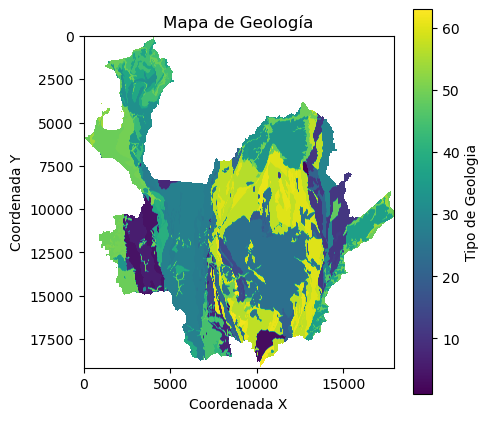

Tamaño del arreglo reducido: (19154, 17898)
Tamaño del vector reducido sin NaNs: (157028388,)
Tamaño de la celda original: 10.0 x 10.0
Tamaño de la celda después de reducir la resolución: 20.001117443289754 x 20.000522084159968


In [46]:
# Ruta al archivo raster
raster_path = r"C:\Users\HOME\radar_antioquia_sentinel\raster\geologia.tif"

# Leer los metadatos del raster y el valor nodata
with rio.open(raster_path) as src:
    raster_meta = src.meta
    nodata_value_geologia = src.nodata

# Imprimir los metadatos del raster y el valor nodata
print(f"Metadatos del raster: {raster_meta}")
print(f"Valor Nodata: {nodata_value_geologia}")

# Dimensiones deseadas
desired_height = 19154
desired_width = 17898

# Reducir la resolución del raster a las dimensiones deseadas
with rio.open(raster_path) as src:
    geologia = src.read(
        out_shape=(src.count, desired_height, desired_width),
        resampling=Resampling.bilinear
    )[0]

# Reemplazar valores no válidos
geologia = np.where(geologia == nodata_value_geologia, np.nan, geologia)

# Ravel y eliminar NaNs
geologia_vector = geologia.ravel()
geologia_vector_MenM = geologia_vector[~np.isnan(geologia_vector)]

# Ajustar la longitud del array a 157,028,388
desired_length = 157028388
geologia_vector_MenM = adjust_length(geologia_vector_MenM, desired_length)

# Asegurar modo interactivo para matplotlib
plt.ion()

# Visualizar el raster reducido
plt.figure(figsize=(5, 5))
plt.imshow(geologia, cmap='viridis')
plt.colorbar(label='Tipo de Geologia')
plt.title('Mapa de Geología')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.show()

print(f"Tamaño del arreglo reducido: {geologia.shape}")
print(f"Tamaño del vector reducido sin NaNs: {geologia_vector_MenM.shape}")

# Obtener la transformación del raster original
with rio.open(raster_path) as src:
    original_transform = src.transform
    original_cell_size_x = original_transform[0]
    original_cell_size_y = -original_transform[4]
    new_cell_size_x = original_cell_size_x * (src.width / desired_width)
    new_cell_size_y = original_cell_size_y * (src.height / desired_height)

print(f"Tamaño de la celda original: {original_cell_size_x} x {original_cell_size_y}")
print(f"Tamaño de la celda después de reducir la resolución: {new_cell_size_x} x {new_cell_size_y}")

Metadatos del raster: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 36063, 'height': 38593, 'count': 1, 'crs': CRS.from_epsg(9377), 'transform': Affine(9.926097046834702, 0.0, 4544733.9274,
       0.0, -9.926122068768946, 2540297.7057)}
Valor Nodata: -9999.0


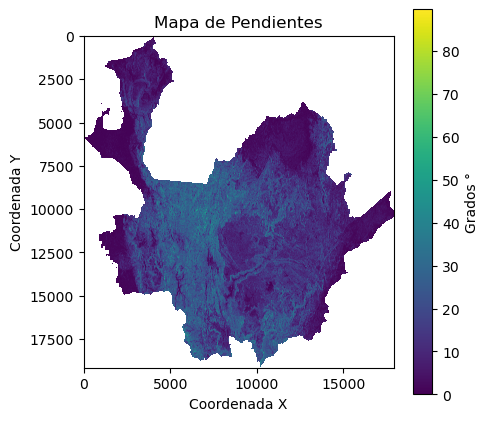

Tamaño del arreglo reducido: (19154, 17898)
Tamaño del vector reducido sin NaNs: (157028388,)
Tamaño de la celda original: 9.926097046834702 x 9.926122068768946
Tamaño de la celda después de reducir la resolución: 20.00027029835735 x 19.999938863944863


In [48]:
# Ruta al archivo raster
raster_path = r"C:\Users\HOME\radar_antioquia_sentinel\raster\pendiente.tif"

# Leer los metadatos del raster y el valor nodata
with rio.open(raster_path) as src:
    raster_meta = src.meta
    nodata_value_pendiente = src.nodata

# Imprimir los metadatos del raster y el valor nodata
print(f"Metadatos del raster: {raster_meta}")
print(f"Valor Nodata: {nodata_value_pendiente}")

# Dimensiones deseadas
desired_height = 19154
desired_width = 17898

# Reducir la resolución del raster a las dimensiones deseadas
with rio.open(raster_path) as src:
    pendiente = src.read(
        out_shape=(src.count, desired_height, desired_width),
        resampling=Resampling.bilinear
    )[0]

# Reemplazar valores no válidos
pendiente = np.where(pendiente == nodata_value_pendiente, np.nan, pendiente)

# Ravel y eliminar NaNs
pendiente_vector = pendiente.ravel()
pendiente_vector_MenM = pendiente_vector[~np.isnan(pendiente_vector)]

# Ajustar la longitud del array a 157,028,388
desired_length = 157028388
pendiente_vector_MenM = adjust_length(pendiente_vector_MenM, desired_length)

# Asegurar modo interactivo para matplotlib
plt.ion()

# Visualizar el raster reducido
plt.figure(figsize=(5, 5))
plt.imshow(pendiente, cmap='viridis')
plt.colorbar(label='Grados °')
plt.title('Mapa de Pendientes')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.show()

print(f"Tamaño del arreglo reducido: {pendiente.shape}")
print(f"Tamaño del vector reducido sin NaNs: {pendiente_vector_MenM.shape}")

# Obtener la transformación del raster original
with rio.open(raster_path) as src:
    original_transform = src.transform
    original_cell_size_x = original_transform[0]
    original_cell_size_y = -original_transform[4]
    new_cell_size_x = original_cell_size_x * (src.width / desired_width)
    new_cell_size_y = original_cell_size_y * (src.height / desired_height)

print(f"Tamaño de la celda original: {original_cell_size_x} x {original_cell_size_y}")
print(f"Tamaño de la celda después de reducir la resolución: {new_cell_size_x} x {new_cell_size_y}")

Metadatos del raster: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028230607370965e+38, 'width': 36063, 'height': 38593, 'count': 1, 'crs': CRS.from_epsg(9377), 'transform': Affine(9.926097046834702, 0.0, 4544733.9274,
       0.0, -9.92609704609645, 2540296.74)}
Valor Nodata: -3.4028230607370965e+38


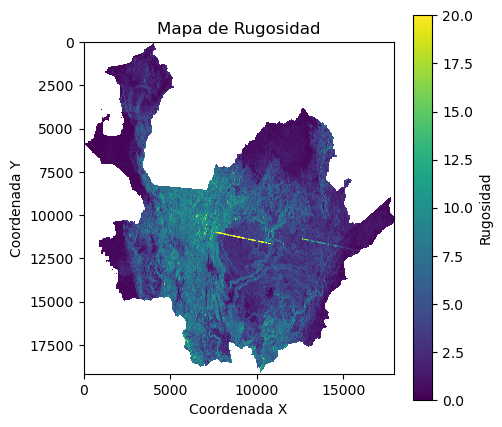

Tamaño del arreglo reducido: (19154, 17898)
Tamaño del vector reducido sin NaNs: (157028388,)
Tamaño de la celda original: 9.926097046834702 x 9.92609704609645
Tamaño de la celda después de reducir la resolución: 20.00027029835735 x 19.999888446277552


In [49]:
# Ruta al archivo raster
raster_path = r"C:\Users\HOME\radar_antioquia_sentinel\raster\rugosidad.tif"

# Leer los metadatos del raster y el valor nodata
with rio.open(raster_path) as src:
    raster_meta = src.meta
    nodata_value_rugosidad = src.nodata

# Imprimir los metadatos del raster y el valor nodata
print(f"Metadatos del raster: {raster_meta}")
print(f"Valor Nodata: {nodata_value_rugosidad}")

# Dimensiones deseadas
desired_height = 19154
desired_width = 17898

# Reducir la resolución del raster a las dimensiones deseadas
with rio.open(raster_path) as src:
    rugosidad = src.read(
        out_shape=(src.count, desired_height, desired_width),
        resampling=Resampling.bilinear
    )[0]

# Reemplazar valores no válidos
rugosidad = np.where(rugosidad == nodata_value_rugosidad, np.nan, rugosidad)

# Ravel y eliminar NaNs
rugosidad_vector = rugosidad.ravel()
rugosidad_vector_MenM = rugosidad_vector[~np.isnan(rugosidad_vector)]

# Ajustar la longitud del array a 157,028,388
desired_length = 157028388
rugosidad_vector_MenM = adjust_length(rugosidad_vector_MenM, desired_length)

# Asegurar modo interactivo para matplotlib
plt.ion()

# Ajustar los límites del colormap
rugosidad_min = np.nanmin(rugosidad)
rugosidad_max = 20 #np.nanmax(rugosidad)

# Visualizar el raster reducido
plt.figure(figsize=(5, 5))
plt.imshow(rugosidad, cmap='viridis', vmin=rugosidad_min, vmax=rugosidad_max)
plt.colorbar(label='Rugosidad')
plt.title('Mapa de Rugosidad')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.show()

print(f"Tamaño del arreglo reducido: {rugosidad.shape}")
print(f"Tamaño del vector reducido sin NaNs: {rugosidad_vector_MenM.shape}")

# Obtener la transformación del raster original
with rio.open(raster_path) as src:
    original_transform = src.transform
    original_cell_size_x = original_transform[0]
    original_cell_size_y = -original_transform[4]
    new_cell_size_x = original_cell_size_x * (src.width / desired_width)
    new_cell_size_y = original_cell_size_y * (src.height / desired_height)

print(f"Tamaño de la celda original: {original_cell_size_x} x {original_cell_size_y}")
print(f"Tamaño de la celda después de reducir la resolución: {new_cell_size_x} x {new_cell_size_y}")

Metadatos del raster: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': 0.0, 'width': 35798, 'height': 38309, 'count': 1, 'crs': CRS.from_epsg(9377), 'transform': Affine(10.0, 0.0, 4544725.24,
       0.0, -10.0, 2540302.7176)}
Valor Nodata: 0.0


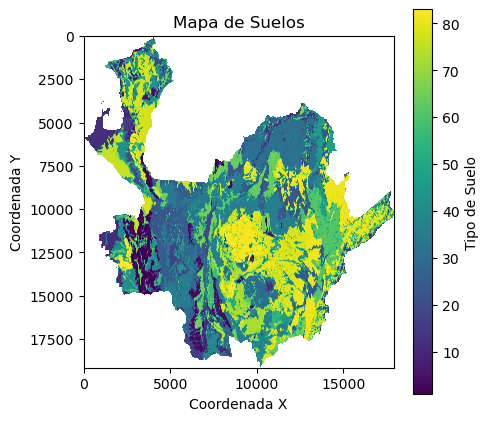

Tamaño del arreglo reducido: (19154, 17898)
Tamaño del vector reducido sin NaNs: (157028388,)
Tamaño de la celda original: 10.0 x 10.0
Tamaño de la celda después de reducir la resolución: 20.001117443289754 x 20.000522084159968


In [50]:
# Ruta al archivo raster
raster_path = r"C:\Users\HOME\radar_antioquia_sentinel\raster\suelos.tif"

# Leer los metadatos del raster y el valor nodata
with rio.open(raster_path) as src:
    raster_meta = src.meta
    nodata_value_suelos = src.nodata

# Imprimir los metadatos del raster y el valor nodata
print(f"Metadatos del raster: {raster_meta}")
print(f"Valor Nodata: {nodata_value_suelos}")

# Dimensiones deseadas
desired_height = 19154
desired_width = 17898

# Reducir la resolución del raster a las dimensiones deseadas
with rio.open(raster_path) as src:
    suelos = src.read(
        out_shape=(src.count, desired_height, desired_width),
        resampling=Resampling.bilinear
    )[0]

# Reemplazar valores no válidos
suelos = np.where(suelos == nodata_value_suelos, np.nan, suelos)

# Ravel y eliminar NaNs
suelos_vector = suelos.ravel()
suelos_vector_MenM = suelos_vector[~np.isnan(suelos_vector)]

# Ajustar la longitud del array a 157,028,388
desired_length = 157028388
suelos_vector_MenM = adjust_length(suelos_vector_MenM, desired_length)

# Asegurar modo interactivo para matplotlib
plt.ion()

# Visualizar el raster reducido
plt.figure(figsize=(5, 5))
plt.imshow(suelos, cmap='viridis')
plt.colorbar(label='Tipo de Suelo')
plt.title('Mapa de Suelos')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.show()

print(f"Tamaño del arreglo reducido: {suelos.shape}")
print(f"Tamaño del vector reducido sin NaNs: {suelos_vector_MenM.shape}")

# Obtener la transformación del raster original
with rio.open(raster_path) as src:
    original_transform = src.transform
    original_cell_size_x = original_transform[0]
    original_cell_size_y = -original_transform[4]
    new_cell_size_x = original_cell_size_x * (src.width / desired_width)
    new_cell_size_y = original_cell_size_y * (src.height / desired_height)

print(f"Tamaño de la celda original: {original_cell_size_x} x {original_cell_size_y}")
print(f"Tamaño de la celda después de reducir la resolución: {new_cell_size_x} x {new_cell_size_y}")

Metadatos del raster: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 36063, 'height': 38593, 'count': 1, 'crs': CRS.from_epsg(9377), 'transform': Affine(9.926097046834702, 0.0, 4544733.9274,
       0.0, -9.926122068768946, 2540297.7057)}
Valor Nodata: -3.4028234663852886e+38


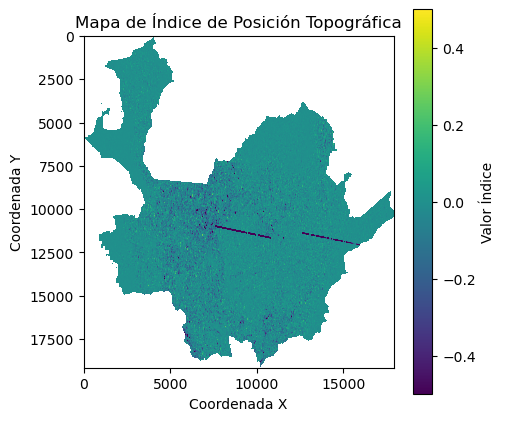

Tamaño del arreglo reducido: (19154, 17898)
Tamaño del vector reducido sin NaNs: (157028388,)
Tamaño de la celda original: 9.926097046834702 x 9.926122068768946
Tamaño de la celda después de reducir la resolución: 20.00027029835735 x 19.999938863944863


In [51]:
# Ruta al archivo raster
raster_path = r"C:\Users\HOME\radar_antioquia_sentinel\raster\TPI.tif"

# Leer los metadatos del raster y el valor nodata
with rio.open(raster_path) as src:
    raster_meta = src.meta
    nodata_value_TPI = src.nodata

# Imprimir los metadatos del raster y el valor nodata
print(f"Metadatos del raster: {raster_meta}")
print(f"Valor Nodata: {nodata_value_TPI}")

# Dimensiones deseadas
desired_height = 19154
desired_width = 17898

# Reducir la resolución del raster a las dimensiones deseadas
with rio.open(raster_path) as src:
    TPI = src.read(
        out_shape=(src.count, desired_height, desired_width),
        resampling=Resampling.bilinear
    )[0]

# Reemplazar valores no válidos
TPI = np.where(TPI == nodata_value_TPI, np.nan, TPI)

# Ravel y eliminar NaNs
TPI_vector = TPI.ravel()
TPI_vector_MenM = TPI_vector[~np.isnan(TPI_vector)]

# Ajustar la longitud del array a 157,028,388
desired_length = 157028388
TPI_vector_MenM = adjust_length(TPI_vector_MenM, desired_length)

# Asegurar modo interactivo para matplotlib
plt.ion()

# Ajustar los límites del colormap
TPI_min = -0.5 #np.nanmin(TPI)
TPI_max = 0.5 #np.nanmax(TPI)

# Visualizar el raster reducido
plt.figure(figsize=(5, 5))
plt.imshow(TPI, cmap='viridis', vmin=TPI_min, vmax=TPI_max)
plt.colorbar(label='Valor Índice')
plt.title('Mapa de Índice de Posición Topográfica')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.show()

print(f"Tamaño del arreglo reducido: {TPI.shape}")
print(f"Tamaño del vector reducido sin NaNs: {TPI_vector_MenM.shape}")

# Obtener la transformación del raster original
with rio.open(raster_path) as src:
    original_transform = src.transform
    original_cell_size_x = original_transform[0]
    original_cell_size_y = -original_transform[4]
    new_cell_size_x = original_cell_size_x * (src.width / desired_width)
    new_cell_size_y = original_cell_size_y * (src.height / desired_height)

print(f"Tamaño de la celda original: {original_cell_size_x} x {original_cell_size_y}")
print(f"Tamaño de la celda después de reducir la resolución: {new_cell_size_x} x {new_cell_size_y}")

Metadatos del raster: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 36063, 'height': 38593, 'count': 1, 'crs': CRS.from_epsg(9377), 'transform': Affine(9.926097046834702, 0.0, 4544733.9274,
       0.0, -9.926122068768946, 2540297.7057)}
Valor Nodata: -9999.0


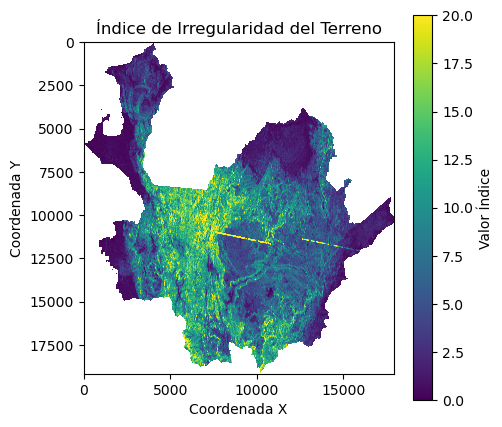

Tamaño del arreglo reducido: (19154, 17898)
Tamaño del vector reducido sin NaNs: (157028388,)
Tamaño de la celda original: 9.926097046834702 x 9.926122068768946
Tamaño de la celda después de reducir la resolución: 20.00027029835735 x 19.999938863944863


In [52]:
# Ruta al archivo raster
raster_path = r"C:\Users\HOME\radar_antioquia_sentinel\raster\TRI.tif"

# Leer los metadatos del raster y el valor nodata
with rio.open(raster_path) as src:
    raster_meta = src.meta
    nodata_value_TRI = src.nodata

# Imprimir los metadatos del raster y el valor nodata
print(f"Metadatos del raster: {raster_meta}")
print(f"Valor Nodata: {nodata_value_TRI}")

# Dimensiones deseadas
desired_height = 19154
desired_width = 17898

# Reducir la resolución del raster a las dimensiones deseadas
with rio.open(raster_path) as src:
    TRI = src.read(
        out_shape=(src.count, desired_height, desired_width),
        resampling=Resampling.bilinear
    )[0]

# Reemplazar valores no válidos
TRI = np.where(TRI == nodata_value_TRI, np.nan, TRI)

# Ravel y eliminar NaNs
TRI_vector = TRI.ravel()
TRI_vector_MenM = TRI_vector[~np.isnan(TRI_vector)]

# Ajustar la longitud del array a 157,028,388
desired_length = 157028388
TRI_vector_MenM = adjust_length(TRI_vector_MenM, desired_length)

# Asegurar modo interactivo para matplotlib
plt.ion()

# Ajustar los límites del colormap
TRI_min = np.nanmin(TRI)
TRI_max = 20 #np.nanmax(TPI)

# Visualizar el raster reducido
plt.figure(figsize=(5, 5))
plt.imshow(TRI, cmap='viridis', vmin=TRI_min, vmax=TRI_max)
plt.colorbar(label='Valor Índice')
plt.title('Índice de Irregularidad del Terreno')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.show()

print(f"Tamaño del arreglo reducido: {TRI.shape}")
print(f"Tamaño del vector reducido sin NaNs: {TRI_vector_MenM.shape}")

# Obtener la transformación del raster original
with rio.open(raster_path) as src:
    original_transform = src.transform
    original_cell_size_x = original_transform[0]
    original_cell_size_y = -original_transform[4]
    new_cell_size_x = original_cell_size_x * (src.width / desired_width)
    new_cell_size_y = original_cell_size_y * (src.height / desired_height)

print(f"Tamaño de la celda original: {original_cell_size_x} x {original_cell_size_y}")
print(f"Tamaño de la celda después de reducir la resolución: {new_cell_size_x} x {new_cell_size_y}")

Metadatos del raster: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 36063, 'height': 38593, 'count': 1, 'crs': CRS.from_epsg(9377), 'transform': Affine(9.926097046834702, 0.0, 4544733.9274,
       0.0, -9.926122068768946, 2540297.7057)}
Valor Nodata: None


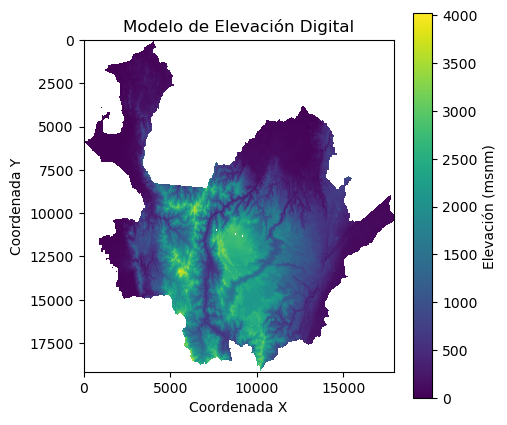

Tamaño del arreglo reducido: (19154, 17898)
Tamaño del vector reducido sin NaNs: (157028388,)
Tamaño de la celda original: 9.926097046834702 x 9.926122068768946
Tamaño de la celda después de reducir la resolución: 20.00027029835735 x 19.999938863944863


In [53]:
# Ruta al archivo raster
raster_path = r"C:\Users\HOME\radar_antioquia_sentinel\raster\dem\dem_ctm12\dem_antioquia.tif"

# Leer los metadatos del raster y el valor nodata
with rio.open(raster_path) as src:
    raster_meta = src.meta
    nodata_value_dem = src.nodata

# Imprimir los metadatos del raster y el valor nodata
print(f"Metadatos del raster: {raster_meta}")
print(f"Valor Nodata: {nodata_value_dem}")

# Dimensiones deseadas
desired_height = 19154
desired_width = 17898

# Reducir la resolución del raster a las dimensiones deseadas
with rio.open(raster_path) as src:
    dem = src.read(
        out_shape=(src.count, desired_height, desired_width),
        resampling=Resampling.bilinear
    )[0]

# Reemplazar valores no válidos
dem = np.where(dem == 0, np.nan, dem)

# Ravel y eliminar NaNs
dem_vector = dem.ravel()
dem_vector_MenM = dem_vector[~np.isnan(dem_vector)]

# Asegurar modo interactivo para matplotlib
plt.ion()

# Visualizar el raster reducido
plt.figure(figsize=(5, 5))
plt.imshow(dem, cmap='viridis')
plt.colorbar(label='Elevación (msnm)')
plt.title('Modelo de Elevación Digital')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.show()

print(f"Tamaño del arreglo reducido: {dem.shape}")
print(f"Tamaño del vector reducido sin NaNs: {dem_vector_MenM.shape}")

# Obtener la transformación del raster original
with rio.open(raster_path) as src:
    original_transform = src.transform
    original_cell_size_x = original_transform[0]
    original_cell_size_y = -original_transform[4]
    new_cell_size_x = original_cell_size_x * (src.width / desired_width)
    new_cell_size_y = original_cell_size_y * (src.height / desired_height)

print(f"Tamaño de la celda original: {original_cell_size_x} x {original_cell_size_y}")
print(f"Tamaño de la celda después de reducir la resolución: {new_cell_size_x} x {new_cell_size_y}")

Metadatos del raster: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 35798, 'height': 38309, 'count': 1, 'crs': CRS.from_epsg(9377), 'transform': Affine(10.0, 0.0, 4544725.24,
       0.0, -10.0, 2540302.7176)}
Valor Nodata: -3.4028234663852886e+38


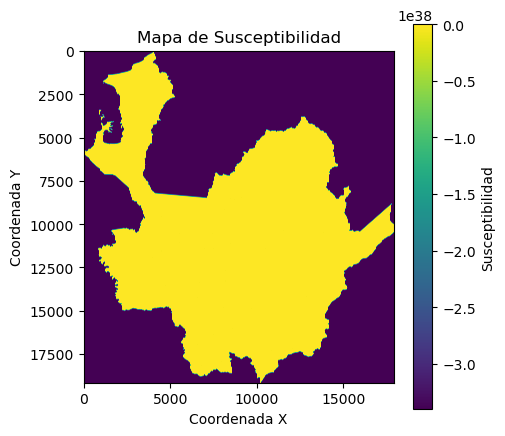

Tamaño del arreglo reducido: (19154, 17898)
Tamaño del vector reducido sin NaNs: (342818292,)
Tamaño de la celda original: 10.0 x 10.0
Tamaño de la celda después de reducir la resolución: 20.001117443289754 x 20.000522084159968


In [3]:
# Ruta al archivo raster
raster_path = r"C:\Users\HOME\radar_antioquia_sentinel\raster\susceptibilidad.tif"

# Leer los metadatos del raster y el valor nodata
with rio.open(raster_path) as src:
    raster_meta = src.meta
    nodata_value_dem = src.nodata

# Imprimir los metadatos del raster y el valor nodata
print(f"Metadatos del raster: {raster_meta}")
print(f"Valor Nodata: {nodata_value_dem}")

# Dimensiones deseadas
desired_height = 19154
desired_width = 17898

# Reducir la resolución del raster a las dimensiones deseadas
with rio.open(raster_path) as src:
    susc = src.read(
        out_shape=(src.count, desired_height, desired_width),
        resampling=Resampling.bilinear
    )[0]

# Reemplazar valores no válidos
susc = np.where(susc == 0, np.nan, susc)

# Ravel y eliminar NaNs
susc_vector = susc.ravel()
susc_vector_MenM = susc_vector[~np.isnan(susc_vector)]

# Asegurar modo interactivo para matplotlib
plt.ion()

# Visualizar el raster reducido
plt.figure(figsize=(5, 5))
plt.imshow(susc, cmap='viridis')
plt.colorbar(label='Susceptibilidad')
plt.title('Mapa de Susceptibilidad')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.show()

print(f"Tamaño del arreglo reducido: {susc.shape}")
print(f"Tamaño del vector reducido sin NaNs: {susc_vector_MenM.shape}")

# Obtener la transformación del raster original
with rio.open(raster_path) as src:
    original_transform = src.transform
    original_cell_size_x = original_transform[0]
    original_cell_size_y = -original_transform[4]
    new_cell_size_x = original_cell_size_x * (src.width / desired_width)
    new_cell_size_y = original_cell_size_y * (src.height / desired_height)

print(f"Tamaño de la celda original: {original_cell_size_x} x {original_cell_size_y}")
print(f"Tamaño de la celda después de reducir la resolución: {new_cell_size_x} x {new_cell_size_y}")

Inventario de Movimientos en Masa:
   CODSIMMA       TIPO_MOV   FECHA_MOV       DPTO MUNICIPIO   VEREDA  valor  \
0     66550          Caida  2023-07-11  ANTIOQUIA   YARUMAL  YARUMAL      1   
1     57297  Deslizamiento  2021-07-30  ANTIOQUIA   YARUMAL  YARUMAL      3   
2     57295  Deslizamiento  2021-06-14  ANTIOQUIA   YARUMAL  YARUMAL      3   
3     52576  Deslizamiento  2020-10-03  ANTIOQUIA   YARUMAL  YARUMAL      3   
4     39683  Deslizamiento  2020-04-06  ANTIOQUIA   YARUMAL  YARUMAL      3   

                          geometry  
0  POINT (4731187.352 2331521.327)  
1  POINT (4729764.480 2334158.624)  
2  POINT (4729563.885 2338055.395)  
3  POINT (4736596.303 2331634.933)  
4  POINT (4729465.612 2340378.603)  

Área de Estudio:
  DPTO_CCDGO DPTO_CNMBR  DPTO_ANO_C                     DPTO_ACT_A  \
0         05  ANTIOQUIA        1886  Constitucion Politica de 1886   

     DPTO_NAREA DPTO_CSMBL  DPTO_VGNC  SHAPE_AREA  SHAPE_LEN  \
0  62804.710252          3       2020    5.13

C:\Users\HOME\AppData\Local\Temp\ipykernel_11508\2691421133.py:23: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


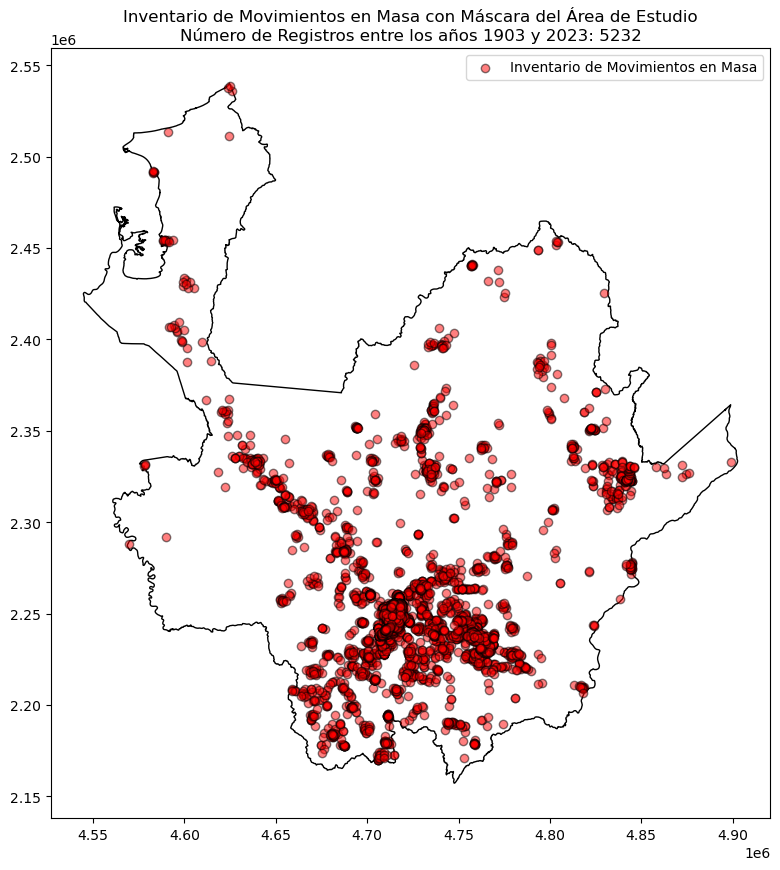

In [21]:
# Rutas a los archivos shapefile
inventario_movimientos_path = r"C:\Users\HOME\OneDrive - Universidad Nacional de Colombia\maestria_big_data\clases\TFM\Catalogo SIMMA\zipfolder\inventario_ctm12.shp"
area_estudio_path = r"C:\Users\HOME\OneDrive - Universidad Nacional de Colombia\maestria_big_data\clases\TFM\shapes\depto_antioquia_ctm12.shp"

# Cargar los shapefiles usando GeoPandas
inventario_movimientos = gpd.read_file(inventario_movimientos_path)
area_estudio = gpd.read_file(area_estudio_path)

# Mostrar los primeros registros de cada shapefile
print("Inventario de Movimientos en Masa:")
print(inventario_movimientos.head())
print("\nÁrea de Estudio:")
print(area_estudio.head())

# Obtener el número total de registros del inventario de movimientos en masa
num_registros = len(inventario_movimientos)

# Visualizar ambos shapefiles en el mismo plot
fig, ax = plt.subplots(figsize=(10, 10))
area_estudio.plot(ax=ax, color='none', edgecolor='black', linewidth=1, label='Área de Estudio')
inventario_movimientos.plot(ax=ax, color='red', edgecolor='black', alpha=0.5, label='Inventario de Movimientos en Masa')
plt.title(f'Inventario de Movimientos en Masa con Máscara del Área de Estudio\nNúmero de Registros entre los años 1903 y 2023: {num_registros}')
plt.legend()
plt.show()


In [54]:
# Verificar la longitud de cada array
print(f"Longitud de dem_vector_MenM: {len(dem_vector_MenM)}")
print(f"Longitud de acumulacion_vector_MenM: {len(acumulacion_vector_MenM)}")
print(f"Longitud de pendiente_vector_MenM: {len(pendiente_vector_MenM)}")
print(f"Longitud de rugosidad_vector_MenM: {len(rugosidad_vector_MenM)}")
print(f"Longitud de aspecto_vector_MenM: {len(aspecto_vector_MenM)}")
print(f"Longitud de dist_vias_vector_MenM: {len(dist_vias_vector_MenM)}")
print(f"Longitud de dist_fallas_vector_MenM: {len(dist_fallas_vector_MenM)}")
print(f"Longitud de suelos_vector_MenM: {len(suelos_vector_MenM)}")
print(f"Longitud de curvatura_vector_MenM: {len(curvatura_vector_MenM)}")
print(f"Longitud de TRI_vector_MenM: {len(TRI_vector_MenM)}")
print(f"Longitud de TPI_vector_MenM: {len(TPI_vector_MenM)}")
print(f"Longitud de geologia_vector_MenM: {len(geologia_vector_MenM)}")
print(f"Longitud de coberturas_vector_MenM: {len(coberturas_vector_MenM)}")


Longitud de dem_vector_MenM: 157028388
Longitud de acumulacion_vector_MenM: 157028388
Longitud de pendiente_vector_MenM: 157028388
Longitud de rugosidad_vector_MenM: 157028388
Longitud de aspecto_vector_MenM: 157028388
Longitud de dist_vias_vector_MenM: 157028388
Longitud de dist_fallas_vector_MenM: 157028388
Longitud de suelos_vector_MenM: 157028388
Longitud de curvatura_vector_MenM: 157028388
Longitud de TRI_vector_MenM: 157028388
Longitud de TPI_vector_MenM: 157028388
Longitud de geologia_vector_MenM: 157028388
Longitud de coberturas_vector_MenM: 157028388
